
# Set up the notebook

In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

import choropleth_utils
math = choropleth_utils.math
os = choropleth_utils.os
plt = choropleth_utils.plt
re = choropleth_utils.re

%run ../../load_magic/dataframes.py
%run ../../load_magic/environment.py
%run ../../load_magic/lists.py
%pprint

pd.options.display.float_format = '{:20,.2f}'.format

notebook_path = get_notebook_path()
print(notebook_path)

s = choropleth_utils.s
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

column_description_dict = s.load_object('column_description_dict')

#c = choropleth_utils.ChoroplethUtilities()
#print(['c.{}'.format(fn) for fn in dir(c) if not fn.startswith('_')])

dir()

Pretty printing has been turned OFF
D:\Documents\Repositories\notebooks\covid19\ipynb\US State Stats.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.decoding_error', 's.decoding_type', 's.encoding_error', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['Config', 'In', 'Out', 'RandomForestClassifier', 'SequenceMatcher', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'check_4_doubles', 'check_for_typos', 'choropleth_utils', 'column_description_dict', 'conjunctify_list', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_tables', 'get_struct_name', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'os', 'pd', 'plt', 'preprocess_data', 'quit', 're', 's', 'similar', 'sm', 'sns', 'stats', 'sys', 'time', 'url_regex', 'urllib']

In [7]:

!start %windir%\explorer.exe "{os.path.abspath(os.path.dirname(notebook_path))}"


---

In [8]:

states_list = []
for state_name in c.one_country_df.index:
    df_name = '{}_df'.format('_'.join(state_name.lower().split(' ')))
    pickle_path = os.path.join(s.saves_pickle_folder, '{}.pickle'.format(df_name))
    if os.path.isfile(pickle_path):
        df = s.load_object(df_name)
        for cn in df.columns:
            if 'test' in cn.lower():
                states_list.append(state_name)
                break
conjunctify_list(states_list)

'Georgia'

In [ ]:

column_descriptions_df = get_column_descriptions(c.one_country_df)
mask_series = (column_descriptions_df.dtype == 'object')
print(column_descriptions_df[mask_series].column_name.tolist())
print()
print(column_descriptions_df[~mask_series].column_name.tolist())

In [34]:

from datetime import date

def merge_dfs(merge_df, df_name, column_name='Deaths_New'):
    df = s.load_object(df_name)
    if column_name in df.columns:
        mask_series = (df[column_name] >= after_cases)
        if df[mask_series].shape[0] > 0:
            df.Date = df.Date.map(lambda ts: date(ts.year, ts.month, ts.day))
            df.set_index('Date', drop=True, inplace=True)
            country_suffix = '_{}'.format(df_name[:-3])
            columns_list = [column_name]
            merge_df = merge_df.merge(df[columns_list], how='outer', left_index=True, right_index=True,
                                      suffixes=('_merge', country_suffix))
            if merge_df.index.has_duplicates:
                raise RuntimeError('{} has duplicates'.format(df_name))
            columns_list = merge_df.columns.tolist()
            columns_list[-1] = columns_list[-1] + country_suffix
            merge_df.columns = columns_list
    
    return merge_df

In [91]:

deaths_dict = s.load_object('deaths_dict')
deaths_dict

{'arkansas_df': ['Deaths_Cumulative', 'Deaths_New'], 'california_df': ['Deaths_Cumulative', 'Deaths_New'], 'colorado_df': ['Deaths_Cumulative', 'Deaths_New'], 'florida_df': ['Deaths_Cumulative', 'Deaths_New'], 'illinois_df': ['Deaths_Cumulative', 'Deaths_New'], 'new_york_df': ['Deaths_Cumulative', 'Deaths_New'], 'oregon_df': ['Deaths_New', 'Deaths_Cumulative'], 'south_carolina_df': ['Deaths_Cumulative', 'Deaths_New'], 'tennessee_df': ['Deaths_Cumulative', 'Deaths_New'], 'vermont_df': ['Deaths_Cumulative', 'Deaths_New']}

In [93]:

merge_df = pd.DataFrame([])
plotted_variable = 'Deaths_Cumulative'
after_cases = 1
deaths_dict = s.load_object('deaths_dict')
for df_name, cn_list in deaths_dict.items():
    if plotted_variable in cn_list:
        merge_df = merge_dfs(merge_df, df_name, plotted_variable)
merge_df.T.head(5).T.sample(5)

,Deaths_Cumulative_arkansas,Deaths_Cumulative_california,Deaths_Cumulative_colorado,Deaths_Cumulative_florida,Deaths_Cumulative_illinois
Date,,,,,
2020-03-21,nan,27.00,5.00,12.00,6.00
2020-02-28,nan,nan,nan,nan,nan
2020-01-31,nan,0.00,nan,nan,nan
2020-03-05,nan,1.00,nan,nan,nan
2020-03-03,nan,nan,nan,0.00,nan


In [94]:

confirms_list = merge_df.columns.tolist()
confirms_list

['Deaths_Cumulative_arkansas', 'Deaths_Cumulative_california', 'Deaths_Cumulative_colorado', 'Deaths_Cumulative_florida', 'Deaths_Cumulative_illinois', 'Deaths_Cumulative_new_york', 'Deaths_Cumulative_oregon', 'Deaths_Cumulative_south_carolina', 'Deaths_Cumulative_tennessee', 'Deaths_Cumulative_vermont']

In [99]:

for column_name in confirms_list:
    merge_df[column_name] = merge_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x)))
    merge_df[column_name] = pd.to_numeric(merge_df[column_name], errors='coerce')
    mask_series = (merge_df[column_name] >= after_cases)
    if merge_df[mask_series].shape[0] > 0:
        ts0 = merge_df[mask_series].index.min()
        new_name = '{}_day'.format(column_name[len(plotted_variable)+1:])
        merge_df[new_name] = (merge_df.index - ts0).days

In [100]:

day_merge_df = pd.DataFrame([])
def create_day_df(column_name):
    new_name = '{}_day'.format(column_name[len(plotted_variable)+1:])
    columns_list = [new_name, column_name]
    df = pd.DataFrame(merge_df[columns_list].values, columns=columns_list, index=merge_df.index)
    df.set_index(new_name, drop=True, inplace=True)
    df.columns = [' '.join(cn[len(plotted_variable)+1:].split('_')).title() for cn in df.columns]
    
    return df
for column_name in confirms_list:
    day_merge_df = day_merge_df.merge(create_day_df(column_name), how='outer', left_index=True,
                                      right_index=True, suffixes=('_merge', '_{}'.format(column_name)))
day_merge_df.interpolate(axis='index', limit_area='inside', inplace=True)
day_merge_df.sample(5)

,Arkansas,California,Colorado,Florida,Illinois,New York,Oregon,South Carolina,Tennessee,Vermont
5.00,nan,100.00,200.00,800.00,900.00,"3,800.00",300.00,300.00,300.00,700.00
-41.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
-13.00,nan,50.00,nan,nan,nan,0.00,0.00,nan,0.00,nan
-40.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
18.00,nan,"2,700.00",nan,nan,nan,nan,nan,nan,nan,nan


In [104]:

tables_url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population'
#!"C:\Program Files (x86)\Google\Chrome\Application\chrome.exe" {tables_url}
tables_list = get_page_tables(tables_url)

[(0, (60, 12))]


In [116]:

states_population_df = tables_list[0].copy()
states_population_df.dropna(axis='columns', how='all', inplace=True)
states_population_df.columns = ['state_name', 'Population_2019', 'Census_2010', 'Percent_Change', 'Absolute_Change',
                                'Total_Representatives', 'Population_per_Electoral_Vote', 'Population_per_House_Seat',
                                'Census_per_House_Seat', 'Percent_US_Population']
columns_list = ['Population_2019', 'Census_2010', 'Population_per_Electoral_Vote', 'Population_per_House_Seat',
                'Census_per_House_Seat']
for column_name in columns_list:
    states_population_df[column_name] = states_population_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('[')[0]))
    states_population_df[column_name] = pd.to_numeric(states_population_df[column_name], errors='coerce')
states_population_df.set_index('state_name', drop=True, inplace=True)
s.store_objects(states_population_df=states_population_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\states_population_df.pickle


In [117]:

set(day_merge_df.columns) - set(states_population_df.index)

set()

In [118]:

days_df = day_merge_df.copy()
days_df = days_df.T

In [120]:

mask_series = (states_population_df.index.isin(days_df.index))
columns_list = ['Census_2010']
for state_name, row_series in states_population_df[mask_series][columns_list].iterrows():
    population = row_series['Census_2010']
    mask_series = (days_df.index == state_name)
    for days_state_name, days_row_series in days_df[mask_series].iterrows():
        for column_name, column_value in days_row_series.iteritems():
            if str(column_value) != 'nan':
                days_df.loc[days_state_name, column_name] = column_value/population

In [121]:

day_merge_df = days_df.copy().T

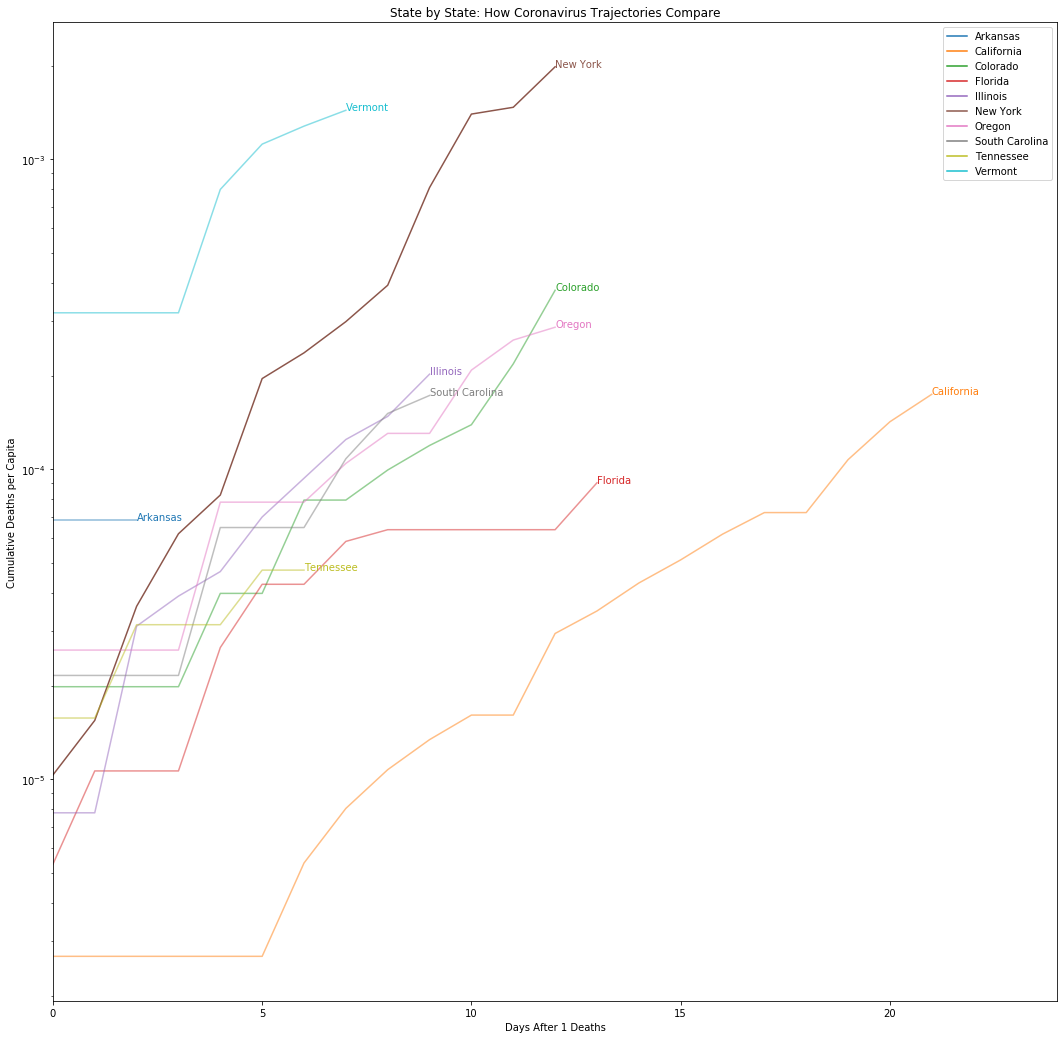

In [122]:

import math

fig, ax = plt.subplots(figsize=(18, 18))
ax.set_yscale('log')
ax.set_xlim(left=0, right=day_merge_df.index.max()+2)
ax.set_ylabel('Cumulative Deaths per Capita')
ax.set_xlabel('Days After {} Deaths'.format(after_cases))
ax.set_title('State by State: How Coronavirus Trajectories Compare')
mask_series = (day_merge_df.index >= 0)
p = day_merge_df[mask_series].plot
AxesSubplot_obj = p.line(ax=ax)
Line2D_obj_list = [Line2D_obj for Line2D_obj in AxesSubplot_obj.get_lines()]
columns_list = day_merge_df.columns.tolist()
for cn, Line2D_obj in zip(columns_list, Line2D_obj_list):
    cn_series = day_merge_df[mask_series][cn]
    cn_series.dropna(inplace=True)
    x = cn_series.index[-1]
    y = cn_series.iloc[-1]
    color = Line2D_obj.get_color()
    annotation = plt.annotate(cn, xy=(x, y), color=color)
    if (cn == 'New York'):
        Line2D_obj.set_alpha(alpha=1.0)
    else:
        Line2D_obj.set_alpha(alpha=0.5)

In [ ]:

kwargs = dict(color='goldenrod', linewidth=0.4, dashes=(10, 10))
cc0 = after_cases
for doubling_every in [2, 3, 4, 7, 30]:
    y_list = [cc0]
    cc = cc0
    while cc < ax.get_ylim()[1]:
        cc = int(cc/(1 - math.log(2)/doubling_every))
        y_list.append(cc)
    Line2D_obj = ax.plot(y_list, **kwargs)
kwargs = dict(color='goldenrod', alpha=1.0)
annotation = plt.annotate('Doubling every\n       2 days', xy=(19, 1.0e6), **kwargs)
annotation = plt.annotate('Doubling every\n       3 days', xy=(35, 2.0e6), **kwargs)
annotation = plt.annotate('Doubling every\n       4 days', xy=(52, 2.5e6), **kwargs)
annotation = plt.annotate('Doubling every\n       week', xy=(50, 2.0e4), **kwargs)
annotation = plt.annotate('Doubling every\n       month', xy=(50, 2.5e2), **kwargs)


---
# Create DataFrames

In [88]:

confirmed_set = set()
cumulative_set = set()
new_set = set()
deaths_set = set()
union_set = set()
intersection_set = set(['Date', 'Confirmed_New', 'Confirmed_Cumulative', 'Deaths_Cumulative', 'Deaths_New'])
for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pickle'):
        df_name = file_name.split('.')[0]
        exec("df = s.load_object('{}')".format(df_name))
        #df = s.load_object(df_name)
        df_set = set()
        for cn in df.columns:
            df_set.add(cn)
            if 'confirm' in cn.lower():
                confirmed_set.add(cn)
            if 'cumul' in cn.lower():
                cumulative_set.add(cn)
            if 'new' in cn.lower():
                new_set.add(cn)
            if 'death' in cn.lower():
                deaths_set.add(cn)
        intersection_set = intersection_set.intersection(df_set)
        union_set = union_set.union(df_set)
s.store_objects(confirmed_set=confirmed_set, cumulative_set=cumulative_set, new_set=new_set, deaths_set=deaths_set,
                union_set=union_set, intersection_set=intersection_set)
deaths_set

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\confirmed_set.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\cumulative_set.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\new_set.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\deaths_set.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\union_set.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\intersection_set.pickle


{'Suicide_Deaths_2014', 'Suicide_Deaths_2005', 'Suicide_Deaths_2016', 'Suicide_Deaths_2015', 'Total_Murder_Deaths_2010', 'deaths_per_day_global_rounded', 'news_mentions_per_death', 'Gun_Suicide_Deaths', 'Total_Gun_Murder_Deaths_2010', 'Deaths_Cumulative', 'Suicide_Deaths_2017', 'Deaths_New'}

In [89]:

confirmed_set = set(['Confirmed_New', 'Confirmed_Cumulative', 'CDC_Confirmed_Cumulative'])
cumulative_set = set(['Exposure_Travel_Cumulative', 'Tests_Cumulative', 'Exposure_Unknown_Cumulative',
                      'Positive_Tests_Cumulative', 'Exposure_Biogen_Cumulative', 'Recovered_Cumulative',
                      'Confirmed_Cumulative', 'Exposure_Local_Cumulative', 'Deaths_Cumulative',
                      'CDC_Confirmed_Cumulative', 'Hospitalizations_Cumulative', 'Presumptive_Cumulative'])
new_set = set(['Hospitalization_Unknown_New', 'Unhospitalized_New', 'Recovered_New', 'Confirmed_New',
               'Deaths_New', 'Hospitalized_New'])
deaths_set = set(['Deaths_Cumulative', 'Deaths_New'])
union_set = set()
intersection_set = confirmed_set.union(cumulative_set).union(new_set).union(deaths_set).union(set(['Date']))
confirmed_dict = {}
cumulative_dict = {}
new_dict = {}
deaths_dict = {}
s.store_objects(confirmed_set=confirmed_set, cumulative_set=cumulative_set, new_set=new_set, deaths_set=deaths_set,
                union_set=union_set, intersection_set=intersection_set)
intersection_set

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\confirmed_set.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\cumulative_set.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\new_set.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\deaths_set.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\union_set.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\intersection_set.pickle


{'Tests_Cumulative', 'Positive_Tests_Cumulative', 'Recovered_Cumulative', 'Date', 'Exposure_Local_Cumulative', 'Hospitalizations_Cumulative', 'Confirmed_New', 'Presumptive_Cumulative', 'Exposure_Travel_Cumulative', 'Exposure_Unknown_Cumulative', 'Hospitalization_Unknown_New', 'Exposure_Biogen_Cumulative', 'Unhospitalized_New', 'Confirmed_Cumulative', 'Recovered_New', 'CDC_Confirmed_Cumulative', 'Deaths_Cumulative', 'Deaths_New', 'Hospitalized_New'}

In [90]:

for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pickle'):
        df_name = file_name.split('.')[0]
        exec("df = s.load_object('{}')".format(df_name))
        columns_list = df.columns
        if 'Date' in columns_list:
            df_set = set(['Date'])
            add_df_set = False
            for cn in columns_list:
                if cn in confirmed_set:
                    df_set.add(cn)
                    add_df_set = True
                    if df_name not in confirmed_dict:
                        confirmed_dict[df_name] = []
                    cn_list = confirmed_dict[df_name].copy()
                    cn_list.append(cn)
                    confirmed_dict[df_name] = cn_list
                if cn in cumulative_set:
                    df_set.add(cn)
                    add_df_set = True
                    if df_name not in cumulative_dict:
                        cumulative_dict[df_name] = []
                    cn_list = cumulative_dict[df_name].copy()
                    cn_list.append(cn)
                    cumulative_dict[df_name] = cn_list
                if cn in new_set:
                    df_set.add(cn)
                    add_df_set = True
                    if df_name not in new_dict:
                        new_dict[df_name] = []
                    cn_list = new_dict[df_name].copy()
                    cn_list.append(cn)
                    new_dict[df_name] = cn_list
                if cn in deaths_set:
                    if df_name not in deaths_dict:
                        deaths_dict[df_name] = []
                    cn_list = deaths_dict[df_name].copy()
                    cn_list.append(cn)
                    deaths_dict[df_name] = cn_list
            if add_df_set:
                intersection_set = intersection_set.intersection(df_set)
                union_set = union_set.union(df_set)
s.store_objects(confirmed_dict=confirmed_dict, cumulative_dict=cumulative_dict, new_dict=new_dict,
                deaths_dict=deaths_dict, union_set=union_set, intersection_set=intersection_set)
intersection_set

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\confirmed_dict.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\cumulative_dict.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\new_dict.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\deaths_dict.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\union_set.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\intersection_set.pickle


{'Confirmed_New', 'Confirmed_Cumulative', 'Date'}


---

In [94]:

completed_set = s.load_object('completed_set')
for state_name in c.one_country_df.index:
    state_name = '_'.join(state_name.split(' '))
    if not state_name in completed_set:
        completed_set.add(state_name)
        tables_url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_{}'.format(state_name)
        #!"C:\Program Files (x86)\Google\Chrome\Application\chrome.exe" {tables_url}
        print('{}_df = tables_list[xxx].copy()'.format(state_name.lower()))
        print('{}_df'.format(state_name.lower()))
        tables_list = get_page_tables(tables_url)
        break
s.store_objects(completed_set=completed_set)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\completed_set.pickle


In [92]:

from datetime import datetime

#tables_url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Washington,_D.C.'
xlsx_dir = os.path.join(s.data_folder, 'xlsx')
file_path = os.path.join(xlsx_dir, 'district_of_columbia.xlsx')
district_of_columbia_df = pd.read_excel(file_path)
district_of_columbia_df.columns = district_of_columbia_df.iloc[1].tolist()
district_of_columbia_df.columns = ['Date', None, None, 'Confirmed_Cumulative', None]
columns_list = ['Date', 'Confirmed_Cumulative']
district_of_columbia_df = district_of_columbia_df[columns_list]
#district_of_columbia_df.Date.to_dict()
idx_list = list(range(2, 21))
mask_series = district_of_columbia_df.index.isin(idx_list)
district_of_columbia_df = district_of_columbia_df[mask_series]
for column_name in district_of_columbia_df.columns:
    if column_name == 'Date':
        district_of_columbia_df[column_name] = pd.to_datetime(district_of_columbia_df[column_name])
        pass
    else:
        district_of_columbia_df[column_name] = district_of_columbia_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        district_of_columbia_df[column_name] = pd.to_numeric(district_of_columbia_df[column_name], errors='coerce')
district_of_columbia_df['Confirmed_New'] = district_of_columbia_df.Confirmed_Cumulative.diff()
idx = 2
district_of_columbia_df.loc[idx, 'Confirmed_New'] = district_of_columbia_df.loc[idx, 'Confirmed_Cumulative']
district_of_columbia_df.Confirmed_New = district_of_columbia_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(district_of_columbia_df=district_of_columbia_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\district_of_columbia_df.pickle


In [71]:

wisconsin_df = tables_list[2].copy()
wisconsin_df.columns = wisconsin_df.iloc[0].tolist()
columns_list = [1, 3]
wisconsin_df = wisconsin_df.iloc[:, columns_list]
wisconsin_df.columns = ['Date', 'Confirmed_Cumulative']
#wisconsin_df.Date.to_dict()
idx_list = [1] + list(range(3, 21))
mask_series = wisconsin_df.index.isin(idx_list)
wisconsin_df = wisconsin_df[mask_series]
for column_name in wisconsin_df.columns:
    if column_name == 'Date':
        wisconsin_df[column_name] = pd.to_datetime(wisconsin_df[column_name])
        pass
    else:
        wisconsin_df[column_name] = wisconsin_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        wisconsin_df[column_name] = pd.to_numeric(wisconsin_df[column_name], errors='coerce')
wisconsin_df['Confirmed_New'] = wisconsin_df.Confirmed_Cumulative.diff()
idx = 1
wisconsin_df.loc[idx, 'Confirmed_New'] = wisconsin_df.loc[idx, 'Confirmed_Cumulative']
wisconsin_df.Confirmed_New = wisconsin_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(wisconsin_df=wisconsin_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\wisconsin_df.pickle


In [62]:

west_virginia_df = tables_list[2].copy()
west_virginia_df.columns = west_virginia_df.iloc[0].tolist()
columns_list = [1, 3]
west_virginia_df = west_virginia_df.iloc[:, columns_list]
west_virginia_df.columns = ['Date', 'Confirmed_Cumulative']
#west_virginia_df.Date.to_dict()
idx_list = list(range(1, 11))
mask_series = west_virginia_df.index.isin(idx_list)
west_virginia_df = west_virginia_df[mask_series]
for column_name in west_virginia_df.columns:
    if column_name == 'Date':
        west_virginia_df[column_name] = pd.to_datetime(west_virginia_df[column_name])
        pass
    else:
        west_virginia_df[column_name] = west_virginia_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        west_virginia_df[column_name] = pd.to_numeric(west_virginia_df[column_name], errors='coerce')
west_virginia_df['Confirmed_New'] = west_virginia_df.Confirmed_Cumulative.diff()
idx = 1
west_virginia_df.loc[idx, 'Confirmed_New'] = west_virginia_df.loc[idx, 'Confirmed_Cumulative']
west_virginia_df.Confirmed_New = west_virginia_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(west_virginia_df=west_virginia_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\west_virginia_df.pickle


In [45]:

from datetime import datetime

#!"C:\Program Files (x86)\Google\Chrome\Application\chrome.exe" {tables_url}
#tables_url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Washington_(state)'
#tables_list = get_page_tables(tables_url)
#!"C:\Program Files (x86)\Google\Chrome\Application\chrome.exe" {tables_url}
#print('{}_df = tables_list[xxx].copy()'.format(state_name.lower()))
xlsx_dir = os.path.join(s.data_folder, 'xlsx')
file_path = os.path.join(xlsx_dir, 'washington.xlsx')
washington_df = pd.read_excel(file_path)
washington_df.columns = washington_df.iloc[0].tolist()
washington_df.columns = ['Date', None, None, 'Confirmed_Cumulative', None]
columns_list = ['Date', 'Confirmed_Cumulative']
washington_df = washington_df[columns_list]
#washington_df.Date.to_dict()
idx_list = list(range(1, 30))
mask_series = washington_df.index.isin(idx_list)
washington_df = washington_df[mask_series]
for column_name in washington_df.columns:
    if column_name == 'Date':
        washington_df[column_name] = pd.to_datetime(washington_df[column_name])
        pass
    else:
        washington_df[column_name] = washington_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        washington_df[column_name] = pd.to_numeric(washington_df[column_name], errors='coerce')
washington_df['Confirmed_New'] = washington_df.Confirmed_Cumulative.diff()
idx = 1
washington_df.loc[idx, 'Confirmed_New'] = washington_df.loc[idx, 'Confirmed_Cumulative']
washington_df.Confirmed_New = washington_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(washington_df=washington_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\washington_df.pickle


In [27]:

virginia_df = tables_list[2].copy()
virginia_df.columns = virginia_df.iloc[0].tolist()
columns_list = [1, 3]
virginia_df = virginia_df.iloc[:, columns_list]
virginia_df.columns = ['Date', 'Confirmed_Cumulative']
#virginia_df.Date.to_dict()
idx_list = list(range(1, 21))
mask_series = virginia_df.index.isin(idx_list)
virginia_df = virginia_df[mask_series]
for column_name in virginia_df.columns:
    if column_name == 'Date':
        virginia_df[column_name] = pd.to_datetime(virginia_df[column_name])
        pass
    else:
        virginia_df[column_name] = virginia_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        virginia_df[column_name] = pd.to_numeric(virginia_df[column_name], errors='coerce')
virginia_df['Confirmed_New'] = virginia_df.Confirmed_Cumulative.diff()
idx = 1
virginia_df.loc[idx, 'Confirmed_New'] = virginia_df.loc[idx, 'Confirmed_Cumulative']
virginia_df.Confirmed_New = virginia_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(virginia_df=virginia_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\virginia_df.pickle


In [18]:

vermont_df = tables_list[2].copy()
vermont_df.columns = vermont_df.iloc[0].tolist()
columns_list = [1, 3, 4]
vermont_df = vermont_df.iloc[:, columns_list]
vermont_df.columns = ['Date', 'Confirmed_Cumulative', 'Deaths_Cumulative']
#vermont_df.Date.to_dict()
idx_list = list(range(1, 21))
mask_series = vermont_df.index.isin(idx_list)
vermont_df = vermont_df[mask_series]
for column_name in vermont_df.columns:
    if column_name == 'Date':
        vermont_df[column_name] = pd.to_datetime(vermont_df[column_name])
        pass
    else:
        vermont_df[column_name] = vermont_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        vermont_df[column_name] = pd.to_numeric(vermont_df[column_name], errors='coerce')
vermont_df['Confirmed_New'] = vermont_df.Confirmed_Cumulative.diff()
idx = 1
vermont_df.loc[idx, 'Confirmed_New'] = vermont_df.loc[idx, 'Confirmed_Cumulative']
vermont_df.Confirmed_New = vermont_df.Confirmed_New.map(lambda x: int(x))
vermont_df['Deaths_New'] = vermont_df.Deaths_Cumulative.diff()
idx = 1
vermont_df.loc[idx, 'Deaths_New'] = vermont_df.loc[idx, 'Deaths_Cumulative']
vermont_df.Deaths_New = vermont_df.Deaths_New.map(lambda x: int(x))
s.store_objects(vermont_df=vermont_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\vermont_df.pickle


In [10]:

utah_df = tables_list[2].copy()
utah_df.columns = utah_df.iloc[0].tolist()
columns_list = [1, 3]
utah_df = utah_df.iloc[:, columns_list]
utah_df.columns = ['Date', 'Confirmed_Cumulative']
#utah_df.Date.to_dict()
idx_list = list(range(1, 22))
mask_series = utah_df.index.isin(idx_list)
utah_df = utah_df[mask_series]
for column_name in utah_df.columns:
    if column_name == 'Date':
        utah_df[column_name] = pd.to_datetime(utah_df[column_name])
        pass
    else:
        utah_df[column_name] = utah_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        utah_df[column_name] = pd.to_numeric(utah_df[column_name], errors='coerce')
utah_df['Confirmed_New'] = utah_df.Confirmed_Cumulative.diff()
idx = 1
utah_df.loc[idx, 'Confirmed_New'] = utah_df.loc[idx, 'Confirmed_Cumulative']
utah_df.Confirmed_New = utah_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(utah_df=utah_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\utah_df.pickle


In [454]:

tennessee_df = tables_list[2].copy()
tennessee_df.columns = ['Date', 'Confirmed_Cumulative', 'Deaths_Cumulative']
def f(x):
    date_str = str(x)
    date_format = '%b %d, %Y'
    date_obj = datetime.strptime('{}, 2020'.format(date_str), date_format)
    
    return date_obj
for column_name in tennessee_df.columns:
    if column_name == 'Date':
        tennessee_df[column_name] = tennessee_df[column_name].map(f)
        tennessee_df[column_name] = pd.to_datetime(tennessee_df[column_name])
    else:
        tennessee_df[column_name] = tennessee_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('-')[0]))
        tennessee_df[column_name] = pd.to_numeric(tennessee_df[column_name], errors='coerce')
tennessee_df = tennessee_df.sort_values('Date').reset_index(drop=True)
tennessee_df['Confirmed_New'] = tennessee_df.Confirmed_Cumulative.diff()
idx = 0
tennessee_df.loc[idx, 'Confirmed_New'] = tennessee_df.loc[idx, 'Confirmed_Cumulative']
tennessee_df.Confirmed_New = tennessee_df.Confirmed_New.map(lambda x: int(x))
tennessee_df['Deaths_New'] = tennessee_df.Deaths_Cumulative.diff()
idx = 0
tennessee_df.loc[idx, 'Deaths_New'] = tennessee_df.loc[idx, 'Deaths_Cumulative']
tennessee_df.Deaths_New = tennessee_df.Deaths_New.map(lambda x: int(x))
s.store_objects(tennessee_df=tennessee_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\tennessee_df.pickle


In [434]:

south_carolina_df = tables_list[2].copy()
south_carolina_df.columns = south_carolina_df.iloc[0].tolist()
columns_list = [1, 3, 4]
south_carolina_df = south_carolina_df.iloc[:, columns_list]
south_carolina_df.columns = ['Date', 'Confirmed_Cumulative', 'Deaths_Cumulative']
#south_carolina_df.Date.to_dict()
idx_list = list(range(1, 20))
mask_series = south_carolina_df.index.isin(idx_list)
south_carolina_df = south_carolina_df[mask_series]
for column_name in south_carolina_df.columns:
    if column_name == 'Date':
        south_carolina_df[column_name] = pd.to_datetime(south_carolina_df[column_name])
        pass
    else:
        south_carolina_df[column_name] = south_carolina_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        south_carolina_df[column_name] = pd.to_numeric(south_carolina_df[column_name], errors='coerce')
south_carolina_df.Deaths_Cumulative = south_carolina_df.Deaths_Cumulative.ffill()
south_carolina_df['Confirmed_New'] = south_carolina_df.Confirmed_Cumulative.diff()
idx = 1
south_carolina_df.loc[idx, 'Confirmed_New'] = south_carolina_df.loc[idx, 'Confirmed_Cumulative']
south_carolina_df.Confirmed_New = south_carolina_df.Confirmed_New.map(lambda x: int(x))
south_carolina_df['Deaths_New'] = south_carolina_df.Deaths_Cumulative.diff()
idx = 10
south_carolina_df.loc[idx, 'Deaths_New'] = south_carolina_df.loc[idx, 'Deaths_Cumulative']
s.store_objects(south_carolina_df=south_carolina_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\south_carolina_df.pickle


In [411]:

pennsylvania_df = tables_list[2].copy()
pennsylvania_df.columns = pennsylvania_df.iloc[0].tolist()
columns_list = [1, 3]
pennsylvania_df = pennsylvania_df.iloc[:, columns_list]
pennsylvania_df.columns = ['Date', 'Confirmed_Cumulative']
#pennsylvania_df.Date.to_dict()
idx_list = list(range(1, 22))
mask_series = pennsylvania_df.index.isin(idx_list)
pennsylvania_df = pennsylvania_df[mask_series]
for column_name in pennsylvania_df.columns:
    if column_name == 'Date':
        pennsylvania_df[column_name] = pd.to_datetime(pennsylvania_df[column_name])
        pass
    else:
        pennsylvania_df[column_name] = pennsylvania_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        pennsylvania_df[column_name] = pd.to_numeric(pennsylvania_df[column_name], errors='coerce')
pennsylvania_df['Confirmed_New'] = pennsylvania_df.Confirmed_Cumulative.diff()
idx = 1
pennsylvania_df.loc[idx, 'Confirmed_New'] = pennsylvania_df.loc[idx, 'Confirmed_Cumulative']
pennsylvania_df.Confirmed_New = pennsylvania_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(pennsylvania_df=pennsylvania_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\pennsylvania_df.pickle


In [402]:

oregon_df = tables_list[4].copy()
oregon_df.columns = ['Date', 'Confirmed_New', 'Confirmed_Cumulative', 'Deaths_New', 'Deaths_Cumulative', 'Doubling_Time', 'Notes']
def f(x):
    date_str = str(x)
    date_format = '%b %d, %Y'
    date_obj = datetime.strptime('{}, 2020'.format(date_str), date_format)
    
    return date_obj
for column_name in ['Date', 'Confirmed_New', 'Confirmed_Cumulative', 'Deaths_New', 'Deaths_Cumulative', 'Doubling_Time']:
    if column_name == 'Date':
        oregon_df[column_name] = oregon_df[column_name].map(f)
        oregon_df[column_name] = pd.to_datetime(oregon_df[column_name])
    else:
        oregon_df[column_name] = oregon_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        oregon_df[column_name] = pd.to_numeric(oregon_df[column_name], errors='coerce')
s.store_objects(oregon_df=oregon_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\oregon_df.pickle


In [385]:

ohio_df = tables_list[2].copy()
ohio_df.columns = ohio_df.iloc[0].tolist()
columns_list = [1, 3]
ohio_df = ohio_df.iloc[:, columns_list]
ohio_df.columns = ['Date', 'Confirmed_Cumulative']
#ohio_df.Date.to_dict()
idx_list = [1] + list(range(3, 19))
mask_series = ohio_df.index.isin(idx_list)
ohio_df = ohio_df[mask_series]
for column_name in ohio_df.columns:
    if column_name == 'Date':
        ohio_df[column_name] = pd.to_datetime(ohio_df[column_name])
        pass
    else:
        ohio_df[column_name] = ohio_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        ohio_df[column_name] = pd.to_numeric(ohio_df[column_name], errors='coerce')
ohio_df['Confirmed_New'] = ohio_df.Confirmed_Cumulative.diff()
idx = 1
ohio_df.loc[idx, 'Confirmed_New'] = ohio_df.loc[idx, 'Confirmed_Cumulative']
ohio_df.Confirmed_New = ohio_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(ohio_df=ohio_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\ohio_df.pickle


In [364]:

north_carolina_df = tables_list[2].copy()
north_carolina_df.columns = north_carolina_df.iloc[0].tolist()
columns_list = [1, 3]
north_carolina_df = north_carolina_df.iloc[:, columns_list]
north_carolina_df.columns = ['Date', 'Confirmed_Cumulative']
#north_carolina_df.Date.to_dict()
idx_list = list(range(1, 16))
mask_series = north_carolina_df.index.isin(idx_list)
north_carolina_df = north_carolina_df[mask_series]
for column_name in north_carolina_df.columns:
    if column_name == 'Date':
        north_carolina_df[column_name] = pd.to_datetime(north_carolina_df[column_name])
        pass
    else:
        north_carolina_df[column_name] = north_carolina_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        north_carolina_df[column_name] = pd.to_numeric(north_carolina_df[column_name], errors='coerce')
north_carolina_df['Confirmed_New'] = north_carolina_df.Confirmed_Cumulative.diff()
idx = 1
north_carolina_df.loc[idx, 'Confirmed_New'] = north_carolina_df.loc[idx, 'Confirmed_Cumulative']
north_carolina_df.Confirmed_New = north_carolina_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(north_carolina_df=north_carolina_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\north_carolina_df.pickle


In [53]:

from datetime import datetime

#tables_url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_New_York_(state)'
#tables_list = get_page_tables(tables_url)
#!"C:\Program Files (x86)\Google\Chrome\Application\chrome.exe" {tables_url}
#print('{}_df = tables_list[xxx].copy()'.format(state_name.lower()))
xlsx_dir = os.path.join(s.data_folder, 'xlsx')
file_path = os.path.join(xlsx_dir, 'new_york.xlsx')
new_york_df = pd.read_excel(file_path)
new_york_df.columns = new_york_df.iloc[1].tolist()
new_york_df.columns = ['Date', None, None, 'Confirmed_Cumulative', 'Deaths_Cumulative']
columns_list = ['Date', 'Confirmed_Cumulative', 'Deaths_Cumulative']
new_york_df = new_york_df[columns_list]
#new_york_df.Date.to_dict()
idx_list = list(range(2, 28))
mask_series = new_york_df.index.isin(idx_list)
new_york_df = new_york_df[mask_series]
for column_name in new_york_df.columns:
    if column_name == 'Date':
        new_york_df[column_name] = pd.to_datetime(new_york_df[column_name])
        pass
    else:
        new_york_df[column_name] = new_york_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        new_york_df[column_name] = pd.to_numeric(new_york_df[column_name], errors='coerce')
new_york_df.Deaths_Cumulative = new_york_df.Deaths_Cumulative.fillna(0)
new_york_df.Deaths_Cumulative = new_york_df.Deaths_Cumulative.map(lambda x: int(x))
new_york_df['Confirmed_New'] = new_york_df.Confirmed_Cumulative.diff()
idx = 2
new_york_df.loc[idx, 'Confirmed_New'] = new_york_df.loc[idx, 'Confirmed_Cumulative']
new_york_df.Confirmed_New = new_york_df.Confirmed_New.map(lambda x: int(x))
new_york_df['Deaths_New'] = new_york_df.Deaths_Cumulative.diff()
idx = 2
new_york_df.loc[idx, 'Deaths_New'] = new_york_df.loc[idx, 'Deaths_Cumulative']
new_york_df.Deaths_New = new_york_df.Deaths_New.map(lambda x: int(x))
s.store_objects(new_york_df=new_york_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\new_york_df.pickle


In [332]:

new_mexico_df = tables_list[2].copy()
new_mexico_df.columns = new_mexico_df.iloc[0].tolist()
columns_list = [1, 3]
new_mexico_df = new_mexico_df.iloc[:, columns_list]
new_mexico_df.columns = ['Date', 'Confirmed_Cumulative']
#new_mexico_df.Date.to_dict()
idx_list = list(range(1, 12))
mask_series = new_mexico_df.index.isin(idx_list)
new_mexico_df = new_mexico_df[mask_series]
for column_name in new_mexico_df.columns:
    if column_name == 'Date':
        new_mexico_df[column_name] = pd.to_datetime(new_mexico_df[column_name])
        pass
    else:
        new_mexico_df[column_name] = new_mexico_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        new_mexico_df[column_name] = pd.to_numeric(new_mexico_df[column_name], errors='coerce')
new_mexico_df['Confirmed_New'] = new_mexico_df.Confirmed_Cumulative.diff()
idx = 1
new_mexico_df.loc[idx, 'Confirmed_New'] = new_mexico_df.loc[idx, 'Confirmed_Cumulative']
new_mexico_df.Confirmed_New = new_mexico_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(new_mexico_df=new_mexico_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\new_mexico_df.pickle


In [321]:

new_jersey_df = tables_list[2].copy()
new_jersey_df.columns = new_jersey_df.iloc[0].tolist()
columns_list = [1, 3]
new_jersey_df = new_jersey_df.iloc[:, columns_list]
new_jersey_df.columns = ['Date', 'Confirmed_Cumulative']
#new_jersey_df.Date.to_dict()
idx_list = list(range(1, 24))
mask_series = new_jersey_df.index.isin(idx_list)
new_jersey_df = new_jersey_df[mask_series]
for column_name in new_jersey_df.columns:
    if column_name == 'Date':
        new_jersey_df[column_name] = pd.to_datetime(new_jersey_df[column_name])
        pass
    else:
        new_jersey_df[column_name] = new_jersey_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        new_jersey_df[column_name] = pd.to_numeric(new_jersey_df[column_name], errors='coerce')
new_jersey_df['Confirmed_New'] = new_jersey_df.Confirmed_Cumulative.diff()
idx = 1
new_jersey_df.loc[idx, 'Confirmed_New'] = new_jersey_df.loc[idx, 'Confirmed_Cumulative']
new_jersey_df.Confirmed_New = new_jersey_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(new_jersey_df=new_jersey_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\new_jersey_df.pickle


In [269]:

mississippi_df = tables_list[2].copy()
mississippi_df.columns = mississippi_df.iloc[0].tolist()
columns_list = [1, 3]
mississippi_df = mississippi_df.iloc[:, columns_list]
mississippi_df.columns = ['Date', 'Confirmed_Cumulative']
#mississippi_df.Date.to_dict()
idx_list = list(range(1, 15))
mask_series = mississippi_df.index.isin(idx_list)
mississippi_df = mississippi_df[mask_series]
for column_name in mississippi_df.columns:
    if column_name == 'Date':
        mississippi_df[column_name] = pd.to_datetime(mississippi_df[column_name])
        pass
    else:
        mississippi_df[column_name] = mississippi_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        mississippi_df[column_name] = pd.to_numeric(mississippi_df[column_name], errors='coerce')
mississippi_df['Confirmed_New'] = mississippi_df.Confirmed_Cumulative.diff()
idx = 1
mississippi_df.loc[idx, 'Confirmed_New'] = mississippi_df.loc[idx, 'Confirmed_Cumulative']
mississippi_df.Confirmed_New = mississippi_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(mississippi_df=mississippi_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\mississippi_df.pickle


In [252]:

michigan_df = tables_list[2].copy()
michigan_df.columns = michigan_df.iloc[0].tolist()
columns_list = [1, 3]
michigan_df = michigan_df.iloc[:, columns_list]
michigan_df.columns = ['Date', 'Confirmed_Cumulative']
#michigan_df.Date.to_dict()
idx_list = list(range(1, 18))
mask_series = michigan_df.index.isin(idx_list)
michigan_df = michigan_df[mask_series]
for column_name in michigan_df.columns:
    if column_name == 'Date':
        michigan_df[column_name] = pd.to_datetime(michigan_df[column_name])
        pass
    else:
        michigan_df[column_name] = michigan_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        michigan_df[column_name] = pd.to_numeric(michigan_df[column_name], errors='coerce')
michigan_df['Confirmed_New'] = michigan_df.Confirmed_Cumulative.diff()
idx = 1
michigan_df.loc[idx, 'Confirmed_New'] = michigan_df.loc[idx, 'Confirmed_Cumulative']
michigan_df.Confirmed_New = michigan_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(michigan_df=michigan_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\michigan_df.pickle


In [243]:

massachusetts_df = tables_list[5].copy()
massachusetts_df.columns = ['Date', 'Confirmed_Cumulative', 'Confirmed_New', '% Δ', 'Presumptive_Cumulative', 'CDC_Confirmed_Cumulative',
                            'Exposure_Biogen_Cumulative', 'Exposure_Local_Cumulative', 'Exposure_Travel_Cumulative',
                            'Exposure_Unknown_Cumulative', 'Hospitalized_New', 'Unhospitalized_New', 'Hospitalization_Unknown_New',
                            'Source']
#massachusetts_df.Date.to_dict()
idx_list = [0, 2] + list(range(4, 26))
mask_series = massachusetts_df.index.isin(idx_list)
massachusetts_df = massachusetts_df[mask_series]
def f(x):
    date_str = str(x)
    date_format = '%B %d, %Y'
    date_obj = datetime.strptime('{}, 2020'.format(date_str), date_format)
    
    return date_obj
for column_name in massachusetts_df.columns:
    if column_name == 'Date':
        massachusetts_df[column_name] = massachusetts_df[column_name].map(f)
        massachusetts_df[column_name] = pd.to_datetime(massachusetts_df[column_name])
        pass
    else:
        massachusetts_df[column_name] = massachusetts_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        massachusetts_df[column_name] = pd.to_numeric(massachusetts_df[column_name], errors='coerce')
#columns_list = ['Date', 'Confirmed_Cumulative', 'Confirmed_New']
#massachusetts_df[columns_list]
s.store_objects(massachusetts_df=massachusetts_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\massachusetts_df.pickle


In [227]:

maryland_df = tables_list[2].copy()
maryland_df.columns = maryland_df.iloc[0].tolist()
columns_list = [1, 3]
maryland_df = maryland_df.iloc[:, columns_list]
maryland_df.columns = ['Date', 'Confirmed_Cumulative']
#maryland_df.Date.to_dict()
idx_list = list(range(1, 23))
mask_series = maryland_df.index.isin(idx_list)
maryland_df = maryland_df[mask_series]
for column_name in maryland_df.columns:
    if column_name == 'Date':
        maryland_df[column_name] = pd.to_datetime(maryland_df[column_name])
        pass
    else:
        maryland_df[column_name] = maryland_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        maryland_df[column_name] = pd.to_numeric(maryland_df[column_name], errors='coerce')
maryland_df['Confirmed_New'] = maryland_df.Confirmed_Cumulative.diff()
idx = 1
maryland_df.loc[idx, 'Confirmed_New'] = maryland_df.loc[idx, 'Confirmed_Cumulative']
maryland_df.Confirmed_New = maryland_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(maryland_df=maryland_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\maryland_df.pickle


In [208]:

louisiana_df = tables_list[2].copy()
louisiana_df.columns = louisiana_df.iloc[0].tolist()
columns_list = [1, 3]
louisiana_df = louisiana_df.iloc[:, columns_list]
louisiana_df.columns = ['Date', 'Confirmed_Cumulative']
#louisiana_df.Date.to_dict()
idx_list = list(range(1, 19))
mask_series = louisiana_df.index.isin(idx_list)
louisiana_df = louisiana_df[mask_series]
for column_name in louisiana_df.columns:
    if column_name == 'Date':
        louisiana_df[column_name] = pd.to_datetime(louisiana_df[column_name])
        pass
    else:
        louisiana_df[column_name] = louisiana_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        louisiana_df[column_name] = pd.to_numeric(louisiana_df[column_name], errors='coerce')
louisiana_df['Confirmed_New'] = louisiana_df.Confirmed_Cumulative.diff()
idx = 1
louisiana_df.loc[idx, 'Confirmed_New'] = louisiana_df.loc[idx, 'Confirmed_Cumulative']
louisiana_df.Confirmed_New = louisiana_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(louisiana_df=louisiana_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\louisiana_df.pickle


In [190]:

kansas_df = tables_list[2].copy()
kansas_df.columns = kansas_df.iloc[0].tolist()
columns_list = [1, 3]
kansas_df = kansas_df.iloc[:, columns_list]
kansas_df.columns = ['Date', 'Confirmed_Cumulative']
#kansas_df.Date.to_dict()
idx_list = list(range(1, 21))
mask_series = kansas_df.index.isin(idx_list)
kansas_df = kansas_df[mask_series]
for column_name in kansas_df.columns:
    if column_name == 'Date':
        kansas_df[column_name] = pd.to_datetime(kansas_df[column_name])
        pass
    else:
        kansas_df[column_name] = kansas_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        kansas_df[column_name] = pd.to_numeric(kansas_df[column_name], errors='coerce')
kansas_df['Confirmed_New'] = kansas_df.Confirmed_Cumulative.diff()
idx = 1
kansas_df.loc[idx, 'Confirmed_New'] = kansas_df.loc[idx, 'Confirmed_Cumulative']
kansas_df.Confirmed_New = kansas_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(kansas_df=kansas_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\kansas_df.pickle


In [181]:

iowa_df = tables_list[2].copy()
iowa_df.columns = iowa_df.iloc[0].tolist()
columns_list = [1, 3]
iowa_df = iowa_df.iloc[:, columns_list]
iowa_df.columns = ['Date', 'Confirmed_Cumulative']
#iowa_df.Date.to_dict()
idx_list = list(range(1, 19))
mask_series = iowa_df.index.isin(idx_list)
iowa_df = iowa_df[mask_series]
for column_name in iowa_df.columns:
    if column_name == 'Date':
        iowa_df[column_name] = pd.to_datetime(iowa_df[column_name])
        pass
    else:
        iowa_df[column_name] = iowa_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        iowa_df[column_name] = pd.to_numeric(iowa_df[column_name], errors='coerce')
iowa_df['Confirmed_New'] = iowa_df.Confirmed_Cumulative.diff()
idx = 1
iowa_df.loc[idx, 'Confirmed_New'] = iowa_df.loc[idx, 'Confirmed_Cumulative']
iowa_df.Confirmed_New = iowa_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(iowa_df=iowa_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\iowa_df.pickle


In [173]:

indiana_df = tables_list[2].copy()
indiana_df.columns = indiana_df.iloc[0].tolist()
columns_list = [1, 3]
indiana_df = indiana_df.iloc[:, columns_list]
indiana_df.columns = ['Date', 'Confirmed_Cumulative']
#indiana_df.Date.to_dict()
idx_list = list(range(1, 21))
mask_series = indiana_df.index.isin(idx_list)
indiana_df = indiana_df[mask_series]
for column_name in indiana_df.columns:
    if column_name == 'Date':
        indiana_df[column_name] = pd.to_datetime(indiana_df[column_name])
        pass
    else:
        indiana_df[column_name] = indiana_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        indiana_df[column_name] = pd.to_numeric(indiana_df[column_name], errors='coerce')
indiana_df['Confirmed_New'] = indiana_df.Confirmed_Cumulative.diff()
idx = 1
indiana_df.loc[idx, 'Confirmed_New'] = indiana_df.loc[idx, 'Confirmed_Cumulative']
indiana_df.Confirmed_New = indiana_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(indiana_df=indiana_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\indiana_df.pickle


In [163]:

illinois_df = tables_list[2].copy()
illinois_df.columns = illinois_df.iloc[0].tolist()
columns_list = [1, 3, 4]
illinois_df = illinois_df.iloc[:, columns_list]
illinois_df.columns = ['Date', 'Confirmed_Cumulative', 'Deaths_Cumulative']
#illinois_df.Date.to_dict()
idx_list = [1, 3, 5, 7] + list(range(9, 11)) + list(range(12, 31))
mask_series = illinois_df.index.isin(idx_list)
illinois_df = illinois_df[mask_series]
for column_name in illinois_df.columns:
    if column_name == 'Date':
        illinois_df[column_name] = pd.to_datetime(illinois_df[column_name])
        pass
    else:
        illinois_df[column_name] = illinois_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        illinois_df[column_name] = pd.to_numeric(illinois_df[column_name], errors='coerce')
illinois_df['Confirmed_New'] = illinois_df.Confirmed_Cumulative.diff()
idx = 1
illinois_df.loc[idx, 'Confirmed_New'] = illinois_df.loc[idx, 'Confirmed_Cumulative']
illinois_df.Confirmed_New = illinois_df.Confirmed_New.map(lambda x: int(x))
illinois_df['Deaths_New'] = illinois_df.Deaths_Cumulative.diff()
idx = 21
illinois_df.loc[idx, 'Deaths_New'] = illinois_df.loc[idx, 'Deaths_Cumulative']
s.store_objects(illinois_df=illinois_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\illinois_df.pickle


In [144]:

hawaii_df = tables_list[2].copy()
hawaii_df.columns = hawaii_df.iloc[0].tolist()
columns_list = [1, 3]
hawaii_df = hawaii_df.iloc[:, columns_list]
hawaii_df.columns = ['Date', 'Confirmed_Cumulative']
#hawaii_df.Date.to_dict()
idx_list = list(range(1, 4)) + list(range(5, 17))
mask_series = hawaii_df.index.isin(idx_list)
hawaii_df = hawaii_df[mask_series]
for column_name in hawaii_df.columns:
    if column_name == 'Date':
        hawaii_df[column_name] = pd.to_datetime(hawaii_df[column_name])
        pass
    else:
        hawaii_df[column_name] = hawaii_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        hawaii_df[column_name] = pd.to_numeric(hawaii_df[column_name], errors='coerce')
hawaii_df['Confirmed_New'] = hawaii_df.Confirmed_Cumulative.diff()
idx = 1
hawaii_df.loc[idx, 'Confirmed_New'] = hawaii_df.loc[idx, 'Confirmed_Cumulative']
hawaii_df.Confirmed_New = hawaii_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(hawaii_df=hawaii_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\hawaii_df.pickle


In [135]:

from datetime import datetime

#print(['urllib.parse.{}'.format(fn) for fn in dir(urllib.parse) if not fn.startswith('_')])
#tables_url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Georgia_(U.S._state)'
#!"C:\Program Files (x86)\Google\Chrome\Application\chrome.exe" {tables_url}
#tables_list = get_page_tables(urllib.parse.quote_plus(tables_url))
#georgia_df = tables_list[0].copy()
xlsx_dir = os.path.join(s.data_folder, 'xlsx')
file_path = os.path.join(xlsx_dir, 'georgia.xlsx')
georgia_df = pd.read_excel(file_path)
georgia_df.columns = georgia_df.iloc[0].tolist()
georgia_df.columns = ['Date', 'Baker', 'Baldwin', 'Barrow', 'Bartow', 'Ben_Hill', 'Bibb', 'Bryan', 'Burke', 'Butts', 'Camden', 'Carroll',
                      'Catoosa', 'Charlton', 'Chatham', 'Chattooga', 'Cherokee', 'Clarke', 'Clayton', 'Clinch', 'Cobb', 'Coffee',
                      'Colquitt', 'Columbia', 'Coweta', 'Crisp', 'Dawson', 'Decatur', 'DeKalb', 'Dodge', 'Dougherty', 'Douglas',
                      'Early', 'Effingham', 'Fannin', 'Fayette', 'Floyd', 'Forsyth', 'Fulton', 'Glynn', 'Gordon', 'Greene', 'Gwinnett',
                      'Hall', 'Harris', 'Heard', 'Henry', 'Houston', 'Irwin', 'Jackson', 'Jasper', 'Jones', 'Lamar', 'Laurens', 'Lee',
                      'Liberty', 'Lincoln', 'Long', 'Lowndes', 'Lumpkin', 'Macon', 'Madison', 'Meriwether', 'Miller', 'Mitchell', 'Monroe',
                      'Morgan', 'Muscogee', 'Newton', 'Oconee', 'Paulding', 'Peach', 'Pickens', 'Pierce', 'Polk', 'Pulaski', 'Randolph',
                      'Richmond', 'Rockdale', 'Seminole', 'Spalding', 'Stephens', 'Sumter', 'Tattnall', 'Taylor', 'Telfair', 'Terrell',
                      'Thomas', 'Tift', 'Troup', 'Turner', 'Twiggs', 'Walton', 'Ware', 'Washington', 'White', 'Whitfield', 'Worth',
                      'Unknown', None, 'Confirmed_New', 'Confirmed_Cumulative', None, 'Hospitalizations_Cumulative',
                      'Positive_Tests_Cumulative', 'Tests_Cumulative']
columns_list = ['Date', 'Baker', 'Baldwin', 'Barrow', 'Bartow', 'Ben_Hill', 'Bibb', 'Bryan', 'Burke', 'Butts', 'Camden', 'Carroll',
                'Catoosa', 'Charlton', 'Chatham', 'Chattooga', 'Cherokee', 'Clarke', 'Clayton', 'Clinch', 'Cobb', 'Coffee',
                'Colquitt', 'Columbia', 'Coweta', 'Crisp', 'Dawson', 'Decatur', 'DeKalb', 'Dodge', 'Dougherty', 'Douglas',
                'Early', 'Effingham', 'Fannin', 'Fayette', 'Floyd', 'Forsyth', 'Fulton', 'Glynn', 'Gordon', 'Greene', 'Gwinnett',
                'Hall', 'Harris', 'Heard', 'Henry', 'Houston', 'Irwin', 'Jackson', 'Jasper', 'Jones', 'Lamar', 'Laurens', 'Lee',
                'Liberty', 'Lincoln', 'Long', 'Lowndes', 'Lumpkin', 'Macon', 'Madison', 'Meriwether', 'Miller', 'Mitchell', 'Monroe',
                'Morgan', 'Muscogee', 'Newton', 'Oconee', 'Paulding', 'Peach', 'Pickens', 'Pierce', 'Polk', 'Pulaski', 'Randolph',
                'Richmond', 'Rockdale', 'Seminole', 'Spalding', 'Stephens', 'Sumter', 'Tattnall', 'Taylor', 'Telfair', 'Terrell',
                'Thomas', 'Tift', 'Troup', 'Turner', 'Twiggs', 'Walton', 'Ware', 'Washington', 'White', 'Whitfield', 'Worth',
                'Unknown', 'Confirmed_New', 'Confirmed_Cumulative', 'Hospitalizations_Cumulative', 'Positive_Tests_Cumulative', 'Tests_Cumulative']
georgia_df = georgia_df[columns_list]
idx_list = list(range(1, 25))
mask_series = georgia_df.index.isin(idx_list)
georgia_df = georgia_df[mask_series]
def f(x):
    date_str = str(x)
    if date_str.endswith(' 00:00:00'):
        date_format = '%Y-%M-%d 00:00:00'
        date_obj = datetime.strptime('{}'.format(date_str), date_format)
    else:
        date_format = '%b %d, %Y'
        date_obj = datetime.strptime('{}, 2020'.format(date_str), date_format)
    
    return date_obj
for column_name in georgia_df.columns:
    if column_name == 'Date':
        georgia_df[column_name] = georgia_df[column_name].map(f)
        georgia_df[column_name] = pd.to_datetime(georgia_df[column_name])
        pass
    else:
        georgia_df[column_name] = georgia_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x)))
        georgia_df[column_name] = pd.to_numeric(georgia_df[column_name], errors='coerce')
s.store_objects(georgia_df=georgia_df)
#columns_list = ['Date', 'Confirmed_New', 'Confirmed_Cumulative']
#georgia_df[columns_list]

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\georgia_df.pickle


In [110]:

florida_df = tables_list[2].copy()
florida_df.columns = florida_df.iloc[0].tolist()
columns_list = [1, 3, 4]
florida_df = florida_df.iloc[:, columns_list]
florida_df.columns = ['Date', 'Confirmed_Cumulative', 'Deaths_Cumulative']
#florida_df.Date.to_dict()
idx_list = list(range(1, 18))
mask_series = florida_df.index.isin(idx_list)
florida_df = florida_df[mask_series]
florida_df['Deaths_New'] = florida_df.Deaths_Cumulative.map(lambda x: str(x).split('(')[1].split(')')[0])
for column_name in florida_df.columns:
    if column_name == 'Date':
        florida_df[column_name] = pd.to_datetime(florida_df[column_name])
        pass
    else:
        florida_df[column_name] = florida_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        florida_df[column_name] = pd.to_numeric(florida_df[column_name], errors='coerce')
florida_df['Confirmed_New'] = florida_df.Confirmed_Cumulative.diff()
idx = 1
florida_df.loc[idx, 'Confirmed_New'] = florida_df.loc[idx, 'Confirmed_Cumulative']
florida_df.Confirmed_New = florida_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(florida_df=florida_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\florida_df.pickle


In [83]:

colorado_df = tables_list[2].copy()
colorado_df.columns = colorado_df.iloc[0].tolist()
columns_list = [1, 3, 4]
colorado_df = colorado_df.iloc[:, columns_list]
colorado_df.columns = ['Date', 'Confirmed_Cumulative', 'Deaths_Cumulative']
#colorado_df.Date.to_dict()
idx_list = list(range(1, 22))
mask_series = colorado_df.index.isin(idx_list)
colorado_df = colorado_df[mask_series]
colorado_df['Confirmed_New'] = colorado_df.Confirmed_Cumulative.map(lambda x: str(x).split('+')[1].split(')')[0])
for column_name in colorado_df.columns:
    if column_name == 'Date':
        colorado_df[column_name] = pd.to_datetime(colorado_df[column_name])
        pass
    else:
        colorado_df[column_name] = colorado_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        colorado_df[column_name] = pd.to_numeric(colorado_df[column_name], errors='coerce')
colorado_df['Deaths_New'] = colorado_df.Deaths_Cumulative.diff()
idx = 9
colorado_df.loc[idx, 'Deaths_New'] = colorado_df.loc[idx, 'Deaths_Cumulative']
s.store_objects(colorado_df=colorado_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\colorado_df.pickle


In [73]:

tables_url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_California'
#!"C:\Program Files (x86)\Google\Chrome\Application\chrome.exe" {tables_url}
tables_list = get_page_tables(tables_url)

[(3, (46, 6)), (4, (33, 5)), (2, (30, 5)), (7, (73, 2)), (5, (24, 5)), (18, (23, 2)), (19, (22, 2)), (9, (17, 2)), (20, (17, 2)), (10, (16, 2)), (1, (13, 2)), (22, (8, 2)), (23, (7, 2)), (11, (5, 2)), (14, (4, 2)), (12, (3, 2)), (15, (3, 2)), (16, (3, 2)), (21, (3, 2)), (17, (2, 2)), (0, (1, 2)), (6, (1, 2)), (8, (1, 2)), (13, (1, 2))]


In [87]:

california_df = tables_list[2].copy()
california_df.columns = california_df.iloc[0].tolist()
columns_list = [1, 3, 4]
california_df = california_df.iloc[:, columns_list]
california_df.columns = ['Date', 'Confirmed_Cumulative', 'Deaths_Cumulative']
#california_df.Date.to_dict()
idx_list = [1, 3, 5] + list(range(7, 29))
mask_series = california_df.index.isin(idx_list)
california_df = california_df[mask_series]
for column_name in california_df.columns:
    if column_name == 'Date':
        california_df[column_name] = pd.to_datetime(california_df[column_name])
        pass
    else:
        california_df[column_name] = california_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        california_df[column_name] = pd.to_numeric(california_df[column_name], errors='coerce')
california_df.Deaths_Cumulative = california_df.Deaths_Cumulative.fillna(0)
california_df.Deaths_Cumulative = california_df.Deaths_Cumulative.map(lambda x: int(x))
california_df['Deaths_New'] = california_df.Deaths_Cumulative.diff()
idx = 1
california_df.loc[idx, 'Deaths_New'] = california_df.loc[idx, 'Deaths_Cumulative']
california_df.Deaths_New = california_df.Deaths_New.map(lambda x: int(x))
california_df.Confirmed_Cumulative = california_df.Confirmed_Cumulative.fillna(0)
california_df.Confirmed_Cumulative = california_df.Confirmed_Cumulative.map(lambda x: int(x))
california_df['Confirmed_New'] = california_df.Confirmed_Cumulative.diff()
idx = 1
california_df.loc[idx, 'Confirmed_New'] = california_df.loc[idx, 'Confirmed_Cumulative']
california_df.Confirmed_New = california_df.Confirmed_New.map(lambda x: int(x))
s.store_objects(california_df=california_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\california_df.pickle


In [61]:

arkansas_df = tables_list[2].copy()
arkansas_df.columns = arkansas_df.iloc[0].tolist()
columns_list = [1, 3, 4]
arkansas_df = arkansas_df.iloc[:, columns_list]
arkansas_df.columns = ['Date', 'Confirmed_Cumulative', 'Deaths_Cumulative']
arkansas_df = arkansas_df.loc[1:16]
for column_name in arkansas_df.columns:
    if column_name == 'Date':
        arkansas_df[column_name] = pd.to_datetime(arkansas_df[column_name])
        pass
    else:
        arkansas_df[column_name] = arkansas_df[column_name].map(lambda x: re.sub('[^\d]+', '', str(x).split('(')[0]))
        arkansas_df[column_name] = pd.to_numeric(arkansas_df[column_name], errors='coerce')
arkansas_df['Confirmed_New'] = arkansas_df.Confirmed_Cumulative.diff()
arkansas_df.loc[1, 'Confirmed_New'] = arkansas_df.loc[1, 'Confirmed_Cumulative']
arkansas_df.Confirmed_New = arkansas_df.Confirmed_New.map(lambda x: int(x))
arkansas_df['Deaths_New'] = arkansas_df.Deaths_Cumulative.diff()
arkansas_df.loc[14, 'Deaths_New'] = arkansas_df.loc[14, 'Deaths_Cumulative']
s.store_objects(arkansas_df=arkansas_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\arkansas_df.pickle



---
# Pickled State DataFrame Cleanup

In [23]:

columns_list = ['Water_Percent', 'Date_Lockdown_Enacted', 'Census_Population_2010', 'Land_Area_sq_mi', 'Population_Per_House_Seat_2019']
states_merge_df.combine_first(states_stats_df).head(6)[columns_list]

,Water_Percent,Date_Lockdown_Enacted,Census_Population_2010,Land_Area_sq_mi,Population_Per_House_Seat_2019
Alabama,nan,"1,585,958,400,000,000,000.00","4,779,736.00","50,645.33",700455
Alaska,nan,"1,585,353,600,000,000,000.00","710,231.00","570,640.95",731545
Arizona,nan,"1,585,612,800,000,000,000.00","6,392,017.00","113,594.08",808746
Arkansas,nan,"-9,223,372,036,854,775,808.00",nan,nan,NaN
California,nan,"1,584,576,000,000,000,000.00","37,254,523.00","155,779.22",745514
Colorado,nan,"1,585,180,800,000,000,000.00","5,029,196.00","103,641.89",822677


In [22]:

columns_list = ['Water_Percent', 'Date_Lockdown_Enacted', 'Census_Population_2010', 'Land_Area_sq_mi', 'Population_Per_House_Seat_2019']
states_stats_df.combine_first(states_merge_df).head(6)[columns_list]

,Water_Percent,Date_Lockdown_Enacted,Census_Population_2010,Land_Area_sq_mi,Population_Per_House_Seat_2019
Alabama,nan,2020-04-04,"4,779,736.00","50,645.33",700455
Alaska,nan,2020-03-28,"710,231.00","570,640.95",731545
Arizona,nan,2020-03-31,"6,392,017.00","113,594.08",808746
Arkansas,nan,NaT,nan,nan,NaN
California,nan,2020-03-19,"37,254,523.00","155,779.22",745514
Colorado,nan,2020-03-26,"5,029,196.00","103,641.89",822677


In [12]:

temp_df = states_stats_df.combine_first(states_merge_df)
states_merge_df.combine_first().head(3).T.head(8).T

,Asian_Percent,Black_Percent,Census_Estimate_2019,Census_Population_2010,Change_Absolute,Change_Percent,Crime_Corrections_Score,Date_Lockdown_Enacted
Alabama,0.01,0.27,"4,903,185.00","4,779,736.00","+123,449",2.6%,45.00,"1,585,958,400,000,000,000.00"
Alaska,0.07,0.03,"731,545.00","710,231.00","+21,314",3.0%,48.00,"1,585,353,600,000,000,000.00"
Arizona,0.03,0.04,"7,278,717.00","6,392,017.00","+886,700",13.9%,42.00,"1,585,612,800,000,000,000.00"


In [ ]:

columns_list = ['State_Abbreviation']
states_stats_df.merge(states_merge_df[columns_list], left_index=True, right_index=True).columns

In [30]:

states_stats_df = s.load_object('states_stats_df')
states_merge_df = s.load_object('states_merge_df')
missing_set = set(states_stats_df.columns) - set(states_merge_df.columns)
missing_set

{'Rank_Current', 'Water_sq_km', 'Land_Area_sq_mi', 'Change_Absolute', 'Population_Per_Electoral_Vote_2019', 'Census_Population_2010', 'House_Seats_Total', 'Population_Per_House_Seat_2019', 'Land_Area_sq_km', 'Total_Area_Rank', 'Date_Lockdown_Enacted', 'Percent_Total_2019', 'Water_sq_mi', 'district_abbreviation', 'Census_Estimate_2019', 'Change_Percent', 'Land_Area_Percent', 'Total_Area_sq_mi', 'Total_Area_sq_km', 'Water_Rank', 'Rank_2010', 'Land_Area_Rank', 'Water_Percent', 'Population_Per_House_Seat_2010'}

In [53]:

states_population_df = s.load_object('states_population_df')
print(missing_set.intersection(set(states_population_df.columns)))
set(states_population_df.columns)

set()


{'Absolute_Change', 'Population_per_House_Seat', 'Census_per_House_Seat', 'Census_2010', 'Percent_Change', 'Percent_US_Population', 'Population_2019', 'Population_per_Electoral_Vote', 'Total_Representatives'}

In [54]:

states_populations_df = s.load_object('states_populations_df')
set(states_populations_df.columns)

{'Rank_Current', 'Water_sq_km', 'Land_Area_sq_mi', 'Change_Absolute', 'Population_Per_Electoral_Vote_2019', 'Census_Population_2010', 'House_Seats_Total', 'Population_Per_House_Seat_2019', 'Land_Area_sq_km', 'Total_Area_Rank', 'Percent_Total_2019', 'Water_sq_mi', 'Census_Estimate_2019', 'Change_Percent', 'Land_Area_Percent', 'Total_Area_sq_mi', 'Total_Area_sq_km', 'Water_Rank', 'Rank_2010', 'Land_Area_Rank', 'Water_Percent', 'Population_Per_House_Seat_2010'}


{'Rank_Current', 'Water_sq_km', 'Land_Area_sq_mi', 'Change_Absolute', 'Population_Per_Electoral_Vote_2019', 'Census_Population_2010', 'Land_Area_sq_km', 'Population_Per_House_Seat_2019', 'House_Seats_Total', 'Total_Area_Rank', 'Percent_Total_2019', 'Water_sq_mi', 'Census_Estimate_2019', 'Change_Percent', 'Land_Area_Percent', 'Total_Area_sq_mi', 'Total_Area_sq_km', 'Water_Rank', 'Rank_2010', 'Land_Area_Rank', 'Water_Percent', 'Population_Per_House_Seat_2010'}

In [78]:

finished_set = missing_set.intersection(set(states_populations_df.columns))
missing_set - finished_set

{'district_abbreviation', 'Date_Lockdown_Enacted'}

In [80]:

states_covid19_lockdowns_df = s.load_object('states_covid19_lockdowns_df')
print(missing_set.intersection(set(states_covid19_lockdowns_df.columns)))
set(states_covid19_lockdowns_df.columns)

set()


{'date_enacted'}

In [98]:

states_covid19_lockdowns_df.date_enacted.head(6)

state_name
Alabama       2020-04-04
Alaska        2020-03-28
Arizona       2020-03-31
California    2020-03-19
Colorado      2020-03-26
Connecticut   2020-03-23
Name: date_enacted, dtype: datetime64[ns]

In [96]:

column_name = 'Date_Lockdown_Enacted'
states_stats_df[column_name] = states_stats_df[column_name].combine_first(states_covid19_lockdowns_df.date_enacted)

In [99]:

columns_list = ['district_abbreviation', 'State_Abbreviation']
states_stats_df[missing_set].head(6).T

,Alabama,Alaska,Arizona,Arkansas,California,Colorado
Rank_Current,24.00,49.00,14.00,NaT,1.00,21.00
Water_sq_km,"4,597.00","245,384.00","1,026.00",NaT,"20,501.00","1,170.00"
Land_Area_sq_mi,"50,645.33","570,640.95","113,594.08",NaT,"155,779.22","103,641.89"
Change_Absolute,"+123,449","+21,314","+886,700",NaT,"+2,257,700","+729,540"
Population_Per_Electoral_Vote_2019,544798,243848,661702,NaT,718404,639860
Census_Population_2010,"4,779,736.00","710,231.00","6,392,017.00",NaT,"37,254,523.00","5,029,196.00"
House_Seats_Total,7,1,9,NaT,53,7
Population_Per_House_Seat_2019,700455,731545,808746,NaT,745514,822677
Land_Area_sq_km,"131,171.00","1,477,953.00","294,207.00",NaT,"403,466.00","268,431.00"
Total_Area_Rank,30.00,1.00,6.00,NaT,3.00,8.00


In [100]:

s.store_objects(states_stats_df=states_stats_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\states_stats_df.pickle


In [102]:

states_stats_df = s.load_object('states_stats_df')
mask_series = (states_stats_df.index == 'Arkansas')
df = states_stats_df[mask_series].T
mask_series = df.Arkansas.isnull()
df[mask_series].index

Index(['district_abbreviation', 'label_line_d', 'Date_Lockdown_Enacted',
       'Rank_Current', 'Rank_2010', 'Census_Estimate_2019',
       'Census_Population_2010', 'Change_Percent', 'Change_Absolute',
       'House_Seats_Total', 'Population_Per_Electoral_Vote_2019',
       'Population_Per_House_Seat_2019', 'Population_Per_House_Seat_2010',
       'Percent_Total_2019', 'Total_Area_Rank', 'Total_Area_sq_mi',
       'Total_Area_sq_km', 'Land_Area_Rank', 'Land_Area_sq_mi',
       'Land_Area_sq_km', 'Land_Area_Percent', 'Water_Rank', 'Water_sq_mi',
       'Water_sq_km', 'Water_Percent'],
      dtype='object')

In [91]:

states_stats_df = s.load_object('states_stats_df')
states_merge_df = s.load_object('states_merge_df')
columns_list = list(set(states_stats_df.columns).intersection(set(states_merge_df.columns)))
states_stats_df = states_stats_df.merge(states_merge_df, how='outer', on=columns_list, left_index=True, right_index=True)

In [92]:

columns_list

['State_Region', 'Multi_Percent', 'GDP_2018', 'Lobbying_Disclosure', 'Black_Percent', 'Suicide_Deaths_2015', 'Google_Suggest_Common', 'Total_Gun_Murder_Deaths_2010', 'Fiscal_Stability_Score', 'State_Population', 'Gun_Murder_Rate_2010', 'Political_Financing', 'Suicide_Deaths_2016', 'Homicide_Rate_2014', 'Suicide_Rate_2017', 'Homicide_Rate_2005', 'centroid_x', 'text_x', 'Hispanic_Percent', 'Guns_Per_Capita', 'Opportunity_Score', 'Internal_Auditing', 'White_Percent', 'Guns_Rank', 'Murder_Rate_2010', 'Gun_Suicide_Rate', 'State_Pension_Fund_Management', 'Crime_Corrections_Score', 'Education_Score', 'State_Abbreviation', 'centroid_y', 'GDP_Percent', 'Google_Suggest_First', 'Suicide_Deaths_2014', 'State_FIPS', 'Suicide_Rate_2014', 'Total_Inhabitants_2010', 'Homicide_Rate_2018', 'Effectiveness_Rank', 'Inhabitants_Per_Square_Mile_2010', 'Suicide_Rate_2016', 'Procurement', 'Suicide_Rate_2015', 'Gun_Ownership_Percent_2013', 'Gini_Index', 'Ethics_Enforcement_Entities', 'Judicial_Accountability', '

In [ ]:

s.store_objects(states_stats_df=states_stats_df)

In [24]:

df_name_list = []
cn_dict = {}
for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pickle') and file_name.startswith('states_'):
        df_name = file_name.split('.')[0]
        print("{} = s.load_object('{}')".format(df_name, df_name))
        print("set({}.columns)".format(df_name))
        print("states_stats_df.merge({}, left_index=True, right_index=True)".format(df_name))
        df_name_list.append(df_name)
        df = s.load_object(df_name)
        cn_dict[df_name] = df.columns.tolist()

states_covid19_lockdowns_df = s.load_object('states_covid19_lockdowns_df')
set(states_covid19_lockdowns_df.columns)
states_stats_df.merge(states_covid19_lockdowns_df, left_index=True, right_index=True)
states_effectiveness_df = s.load_object('states_effectiveness_df')
set(states_effectiveness_df.columns)
states_stats_df.merge(states_effectiveness_df, left_index=True, right_index=True)
states_merge_df = s.load_object('states_merge_df')
set(states_merge_df.columns)
states_stats_df.merge(states_merge_df, left_index=True, right_index=True)
states_populations_df = s.load_object('states_populations_df')
set(states_populations_df.columns)
states_stats_df.merge(states_populations_df, left_index=True, right_index=True)
states_population_df = s.load_object('states_population_df')
set(states_population_df.columns)
states_stats_df.merge(states_population_df, left_index=True, right_index=True)
states_race_df = s.load_object('states_race_df')
set(states_race_df.columns)
states_stats_df.merge(states_

In [25]:

for df_name, columns_list in cn_dict.items():
    print()
    print(df_name, columns_list)


states_covid19_lockdowns_df ['date_enacted']

states_effectiveness_df ['Rank', 'Health Care', 'Education', 'Economy', 'Infrastructure', 'Opportunity', 'Fiscal Stability', 'Crime & Corrections', 'Natural Environment']

states_merge_df ['White_Percent', 'Black_Percent', 'Hispanic_Percent', 'Asian_Percent', 'Native_Percent', 'Islander_Percent', 'Multi_Percent', 'Gini_Index', 'Effectiveness_Rank', 'Health_Care_Score', 'Education_Score', 'Economy_Score', 'Infrastructure_Score', 'Opportunity_Score', 'Fiscal_Stability_Score', 'Crime_Corrections_Score', 'Natural_Environment_Score', 'State_Abbreviation', 'GDP_Rank', 'GDP_2018', 'GDP_Percent', 'State_Region', 'Homicide_Rate_2018', 'Homicide_Rate_2017', 'Homicide_Rate_2014', 'Homicide_Rate_2010', 'Homicide_Rate_2005', 'Homicide_Rate_2000', 'Homicide_Rate_1996', 'Guns_Rank', 'Guns_Per_Capita', 'Guns_Registered', 'Suicide_Rate_2017', 'Suicide_Deaths_2017', 'Suicide_Rate_2016', 'Suicide_Deaths_2016', 'Suicide_Rate_2015', 'Suicide_Deaths_2015', 'Sui

In [57]:

states_stats_df = states_stats_df.merge(states_merge_df[columns_list], left_index=True, right_index=True)
s.store_objects(states_stats_df=states_stats_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\states_stats_df.pickle


In [36]:

columns_set = set()
for df_name in df_name_list:
    for column_name in cn_dict[df_name]:
        columns_set.add(column_name)
columns_set

{'Land_Area_sq_km', 'Gun_Suicide_Deaths', 'Crime_Corrections_Score', 'Suicide_Rate_2005', 'Homicide_Rate_2010', 'Opportunity_Score', 'Total_Representatives', 'Guns_Registered', 'Asian_Percent', 'outline_d', 'Gini_Index', 'Date', 'Date_Lockdown_Enacted', 'Opportunity', 'Total_Inhabitants_2010', 'Electoral_Oversight', 'Suicide_Deaths_2014', 'Black_Percent', 'Deaths_Cumulative', 'Water_Percent', 'Multi_Percent', 'Economy_Score', 'Guns_Per_Capita', 'State_Budget_Processes', 'Total_Gun_Murder_Deaths_2010', 'Health Care', 'Rank', 'Guns_Rank', 'Homicide_Rate_2018', 'Islander_Percent', 'Health_Care_Score', 'Infrastructure_Score', 'Public_Access_to_Information', 'Internal_Auditing', 'Change_Absolute', 'GDP_Rank', 'Gun_Suicide_Rate', 'Total_Area_sq_km', 'Suicide_Rate_2015', 'Suicide_Rate_2016', 'Percent_Total_2019', 'Census_Estimate_2019', 'label_line_d', 'Google_Suggest_First', 'Legislative_Accountability', 'Confirmed_Doubling', 'Total_Area_sq_mi', 'Land_Area_sq_mi', 'Rank_2010', 'centroid_y', 